<a href="https://colab.research.google.com/github/Topanalkahari/Predict-Online-Course-Engagement/blob/main/online_course_engagement_manual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#membaca drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/datasets
!ls

Mounted at /content/drive
/content/drive/My Drive/datasets
animal_condition_classification_dataset
BA_reviews.csv
BA_reviews_with_sentiment.csv
customer_booking.csv
customer_segmentation_data_for_marketing_analysis
fake_news_detection_dataset
indonesian_fact_and_hoax_political_news
logs.log
my_dir
my_saved_experiment1
online_course_engagement
predict_CourseCompletion_online_course_randomforest.pkl
predicting_churn_for_bank_customers
rockpaperscissors


In [2]:
#load data
df = pd.read_csv('https://raw.githubusercontent.com/Topanalkahari/Predict-Online-Course-Engagement/main/online_course_engagement_data.csv')
df

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0
...,...,...,...,...,...,...,...,...,...
8995,8757,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,894,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,6323,Health,38.212512,3,3,69.508297,70.188159,1,0
8998,3652,Health,70.048665,13,10,79.655182,72.975225,1,1


In [3]:
#drop unneeded columns
df = df.drop('UserID', axis = 1)

In [4]:
df.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,Science,35.038427,17,10,59.198853,95.433162,0,1
4,Programming,92.490647,16,0,98.428285,18.102478,0,0


# **Meta Information about dataframe**

In [5]:
#checking shape of data
df.shape

(9000, 8)

In [6]:
#checking columns of data frame
df.columns

Index(['CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CourseCategory         9000 non-null   object 
 1   TimeSpentOnCourse      9000 non-null   float64
 2   NumberOfVideosWatched  9000 non-null   int64  
 3   NumberOfQuizzesTaken   9000 non-null   int64  
 4   QuizScores             9000 non-null   float64
 5   CompletionRate         9000 non-null   float64
 6   DeviceType             9000 non-null   int64  
 7   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 562.6+ KB


In [8]:
df.describe()

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


In [9]:
#checks the value of each unique in the column of type object
df['CourseCategory'].value_counts()

CourseCategory
Business       1837
Health         1821
Science        1814
Programming    1810
Arts           1718
Name: count, dtype: int64

**Missing Values**

In [10]:
#check for null values
df.isnull().sum()

CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

**Duplicate Data**

In [11]:
#check for duplicate values
df.duplicated().sum()

877

In [12]:
#drop duplicate
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

# **ENCODING**

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [15]:
#Encoding data
label_encoder = LabelEncoder()
df['CourseCategory'] = label_encoder.fit_transform(df['CourseCategory'])

In [16]:
df.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0


**Check the Correlation between Target and Each of Columns**

In [17]:
df.corr()["CourseCompletion"]

CourseCategory          -0.003048
TimeSpentOnCourse        0.186399
NumberOfVideosWatched    0.239476
NumberOfQuizzesTaken     0.291650
QuizScores               0.304706
CompletionRate           0.328800
DeviceType               0.008663
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

# **Visualize correlation of independent features and check multicolinarity problems**

<Axes: >

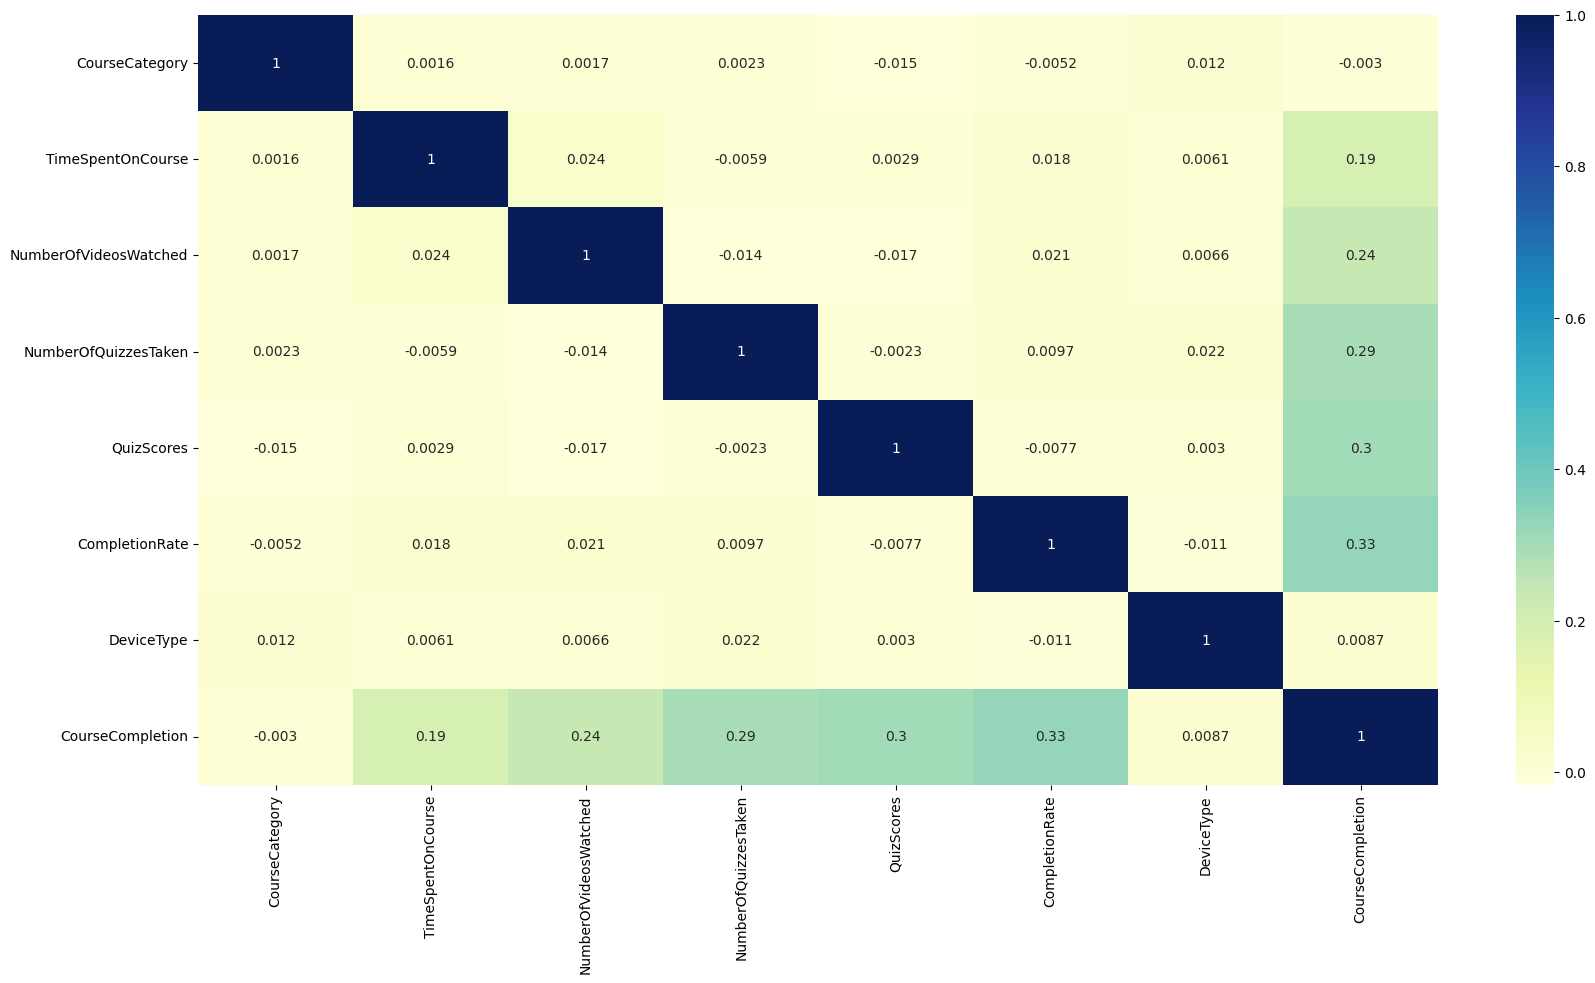

In [18]:
#Visualize corrrelaction each features
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu",linecolor='black')

In [19]:
#with the function we can select highly correlated  independent features
#it will remove the first feature that is correlated with anything other feature
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr

In [20]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

# **EDA & Visualization**

In [21]:
df.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,2,29.979719,17,3,50.365656,20.860773,1,0
1,0,27.802640,1,5,62.615970,65.632415,1,0
2,0,86.820485,14,2,78.458962,63.812007,1,1
3,4,35.038427,17,10,59.198853,95.433162,0,1
4,3,92.490647,16,0,98.428285,18.102478,0,0


In [22]:
numeric_col=["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]

In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
import cufflinks as cf

In [ ]:
from plotly.offline import iplot

In [23]:
import plotly.express as px

In [24]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=700,height=300)

    fig.show();

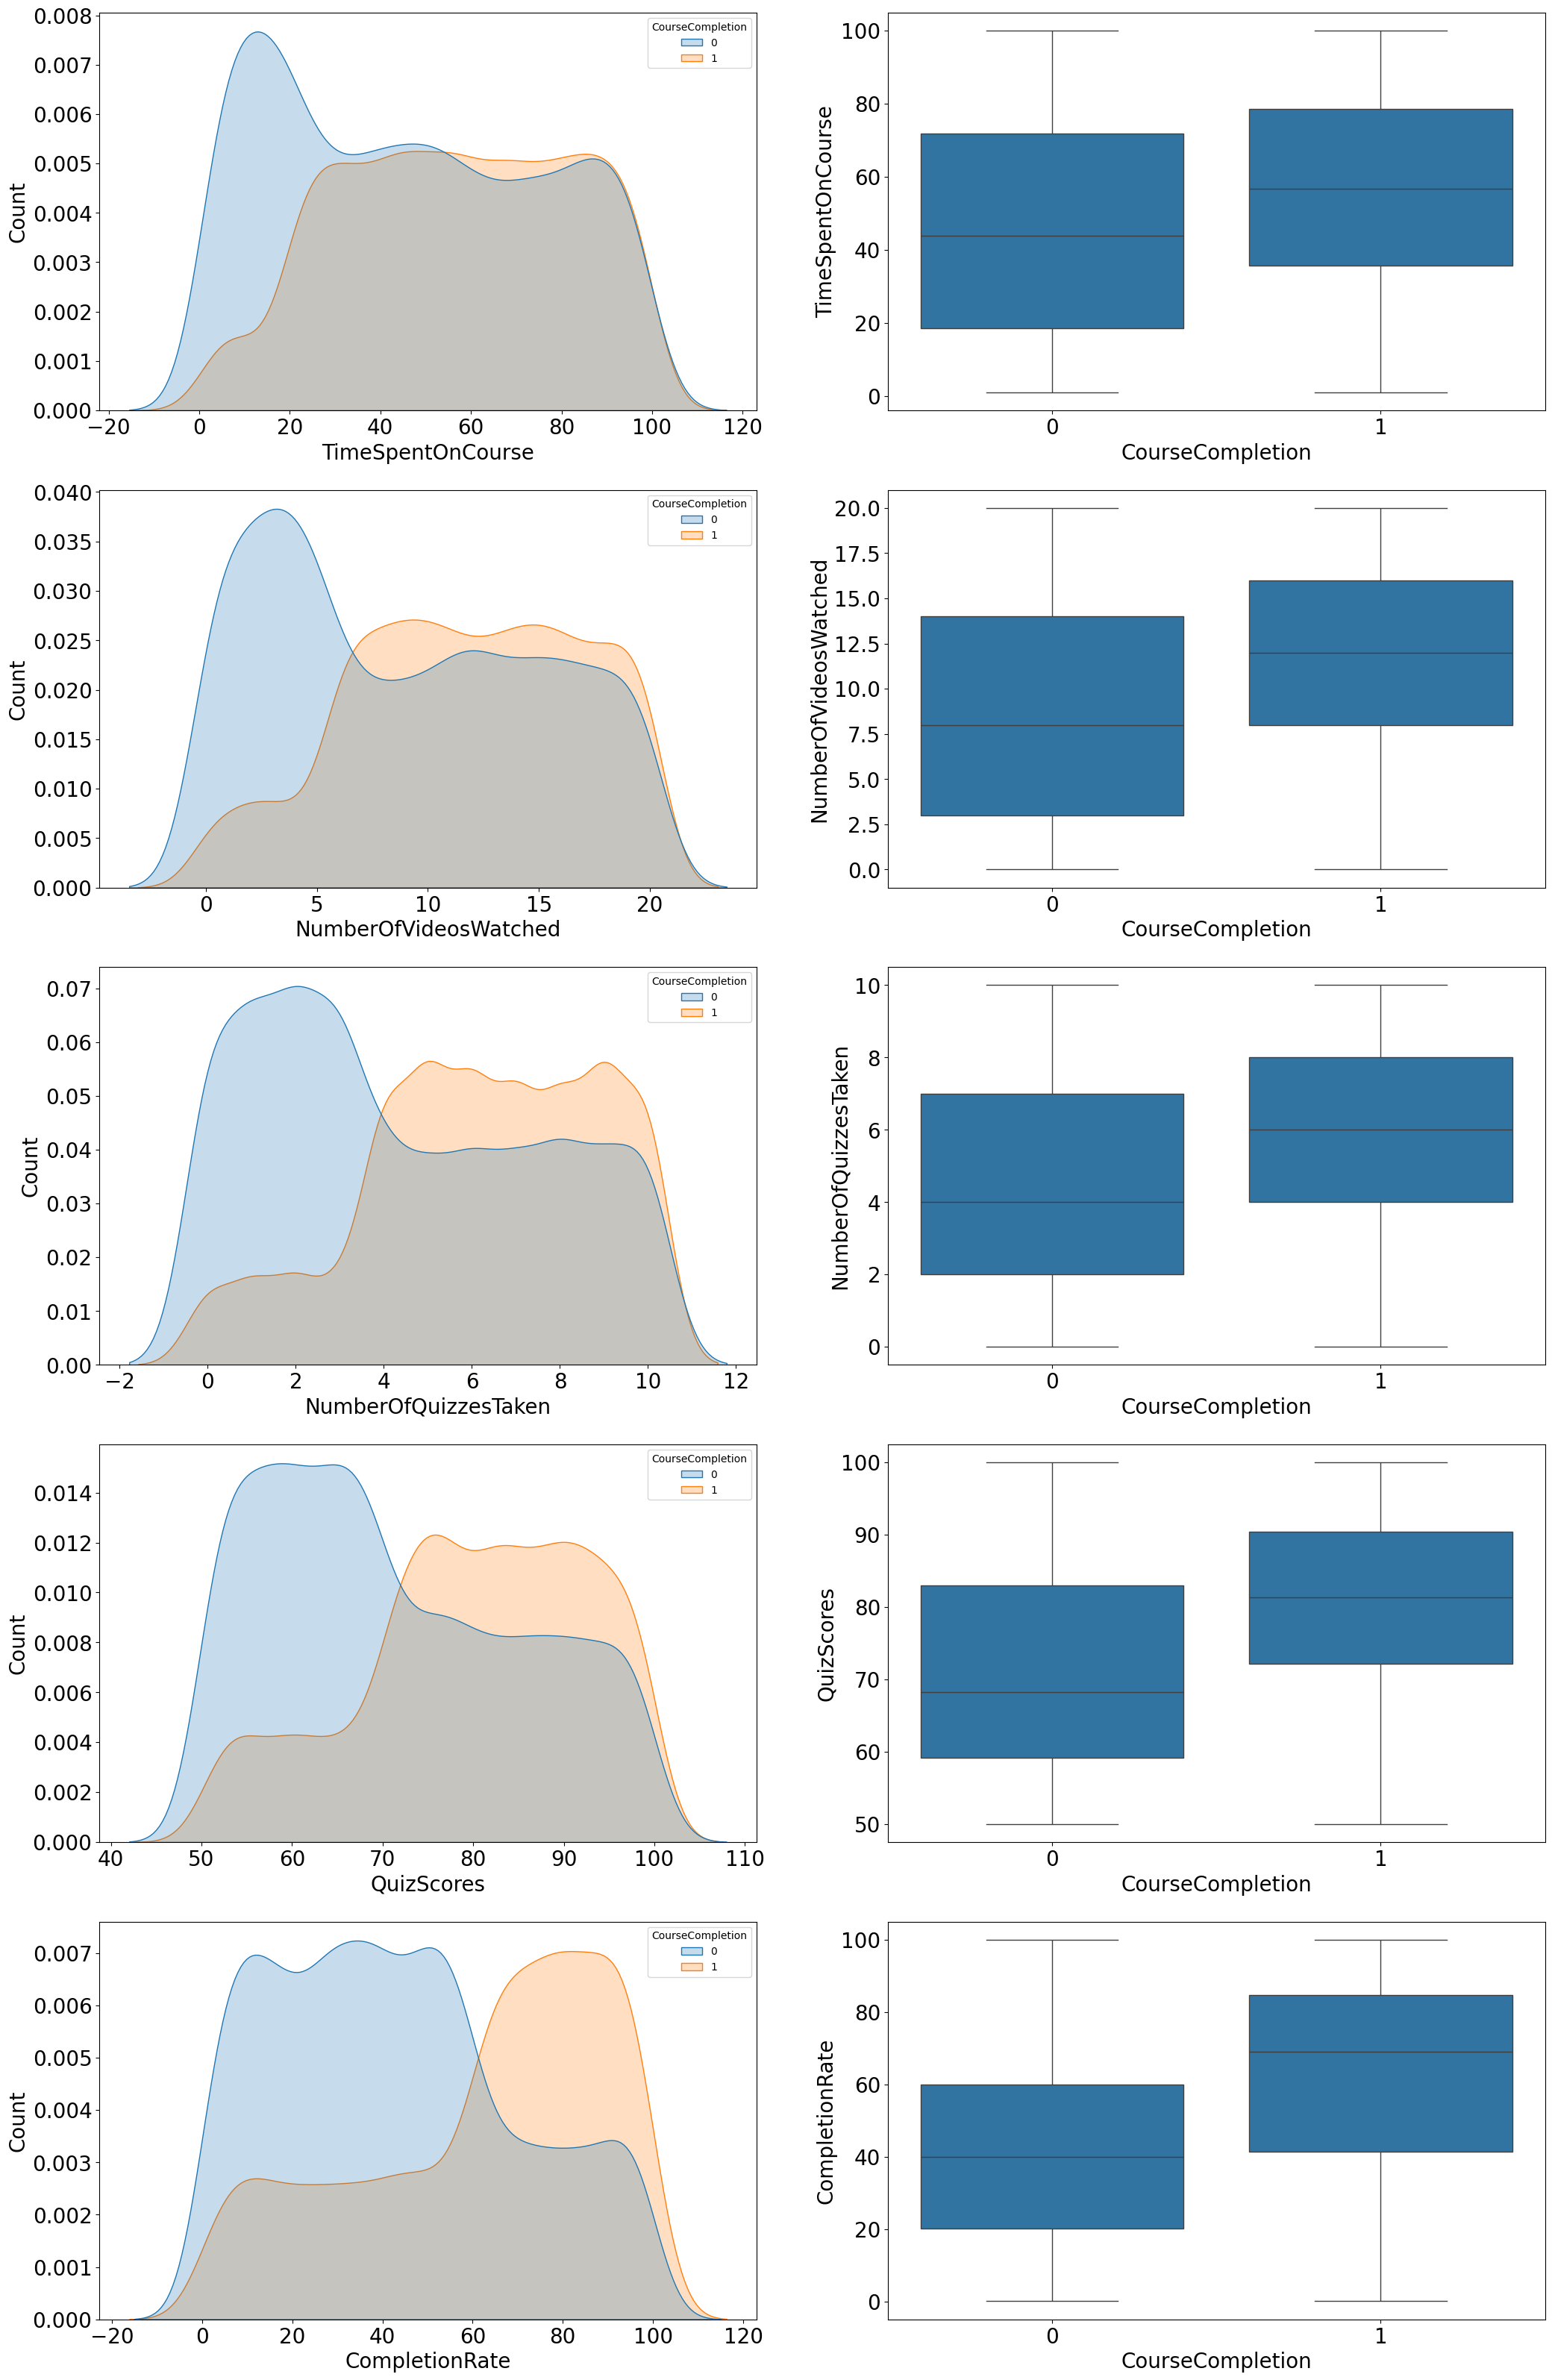

In [25]:
i = 1
plt.figure(figsize=(25, 90))

for col in numeric_col:
    plt.subplot(11, 2, i)
    sns.kdeplot(data=df, hue="CourseCompletion", x=col, fill=True)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(col, fontsize=20)
    plt.ylabel("Count", fontsize=20)
    i = i + 1

    plt.subplot(11, 2, i)
    sns.boxplot(x="CourseCompletion", y=col, data=df)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("CourseCompletion", fontsize=20)
    plt.ylabel(col, fontsize=20)
    i = i + 1

plt.show();

# **Target column EDA**

In [26]:
df['CourseCompletion'].value_counts()

CourseCompletion
0    4555
1    3568
Name: count, dtype: int64

In [27]:
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCompletion",
             title = "<b>Counts in CourseCompletion</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show();

# **Categorical columns EDA**

In [28]:
encoded_cat=["CourseCategory",'DeviceType']

**Count and Pie plot for CourseCategory Col**

In [29]:
# Calculate the value counts for CourseCategory
value_counts = df['CourseCategory'].value_counts().reset_index()
value_counts.columns = ['CourseCategory', 'Count']

# Generate the count plot
fig = px.bar(value_counts, x='CourseCategory', y='Count', text='Count', title='CourseCategory Count Plot',
             color='CourseCategory',width=700,height=400)

# Customize the layout
fig.update_layout(
    xaxis_title='CourseCategory',
    yaxis_title='Count',
    template='plotly_dark'
)

# Show the figure
fig.show();

In [30]:
# Calculate the value counts for CourseCategory
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "CourseCategory",
             title = "<b>Counts in CourseCategory</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show();

**Count and Pie plot for DeviceType Col**

In [31]:
# Calculate the value counts for DeviceType
value_counts = df['DeviceType'].value_counts().reset_index()
value_counts.columns = ['DeviceType', 'Count']

# Generate the count plot
fig = px.bar(value_counts, x='DeviceType', y='Count', text='Count', title='DeviceType Count Plot',
             color='DeviceType',width=700,height=400)

# Customize the layout
fig.update_layout(
    xaxis_title='DeviceType',
    yaxis_title='Count',
    template='plotly_dark'
)

# Show the figure
fig.show();

In [32]:
# Calculate the value counts for CourseCategory
colors = ['gold', 'mediumturquoise']

fig = px.pie(df, names = "DeviceType",
             title = "<b>Counts in DeviceType</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400,
            )

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))


fig.show()

# **Features Engineering**

In [33]:
# Get the features and terget columns
X=df.iloc[:,0:-1]
y=df.CourseCompletion

In [34]:
X.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
0,2,29.979719,17,3,50.365656,20.860773,1
1,0,27.802640,1,5,62.615970,65.632415,1
2,0,86.820485,14,2,78.458962,63.812007,1
3,4,35.038427,17,10,59.198853,95.433162,0
4,3,92.490647,16,0,98.428285,18.102478,0


# **Normalized skewed columns**

In [35]:
#let find the skewed col and fix them

skew_limit=0.75 # limit for skewed col
skew_vals=X[numeric_col].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1
# print("Columns names: ",skew_col.index)
print("\n")
print("Number of Skewed columns:--->>\n",len(skew_col))
# plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1


plt.show();



Number of Skewed columns:--->>
 0


# **Outliers detection and removed**

In [36]:
# Function to detect outliers in a given data series
def outlier(data):
    mean = data.mean()
    std = data.std()

    # Find the boundaries for outliers
    highest = mean + 3 * std
    lowest = mean - 3 * std

    # Find the outliers
    outliers = data[(data > highest) | (data < lowest)]

    return outliers

# Outliers detection and removal function for specified columns
def detect_and_remove_outliers(df, columns):
    outliers_df = pd.DataFrame()  # DataFrame to store outlier rows
    for col in columns:
        if col in df.columns:
            test = outlier(df[col])
            print("Column name:", col)
            print("Number of outliers:", len(test))
            print("\n")
            outliers_rows = df.loc[test.index]
            print("Outliers rows:")
#             print(outliers_rows)
#             print("<<<<<<<<<------------------------------------->>>>>>>>>")
#             print("\n")
            outliers_df = pd.concat([outliers_df, outliers_rows])

    # Drop outliers from the original DataFrame
    df = df.drop(outliers_df.index, axis=0)

    return df, outliers_df


numeric_cols = ["TimeSpentOnCourse","NumberOfVideosWatched","NumberOfQuizzesTaken","QuizScores","CompletionRate"]
cleaned_df, outliers = detect_and_remove_outliers(X, numeric_cols)

Column name: TimeSpentOnCourse
Number of outliers: 0


Outliers rows:
Column name: NumberOfVideosWatched
Number of outliers: 0


Outliers rows:
Column name: NumberOfQuizzesTaken
Number of outliers: 0


Outliers rows:
Column name: QuizScores
Number of outliers: 0


Outliers rows:
Column name: CompletionRate
Number of outliers: 0


Outliers rows:


# **Splitting Data**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# splitting data feature and target
X = df.drop('CourseCompletion', axis=1)
y = df['CourseCompletion']

# splitting data to training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the size of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 7), (2437, 7), (5686,), (2437,))

# **Scaling / Normalize**

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
# MinMaxScaler Initialization
min_max_scaler = MinMaxScaler()

X_train_scaled=min_max_scaler.fit_transform(X_train)
X_test_scaled= min_max_scaler.transform(X_test)

#For StandardScaler
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X.columns) # Use the original DataFrame X to get column names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X.columns)

X_train = X_train_scaled_df
X_test = X_test_scaled_df
X_train.head()

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType
0,0.75,0.469290,0.70,0.4,0.511063,0.533341,0.0
1,0.50,0.485618,0.50,1.0,0.168709,0.922284,0.0
2,0.00,0.595070,0.35,0.2,0.789632,0.176502,0.0
3,0.25,0.619472,0.40,0.6,0.986969,0.626207,1.0
4,0.75,0.606483,0.65,0.6,0.359909,0.420846,1.0


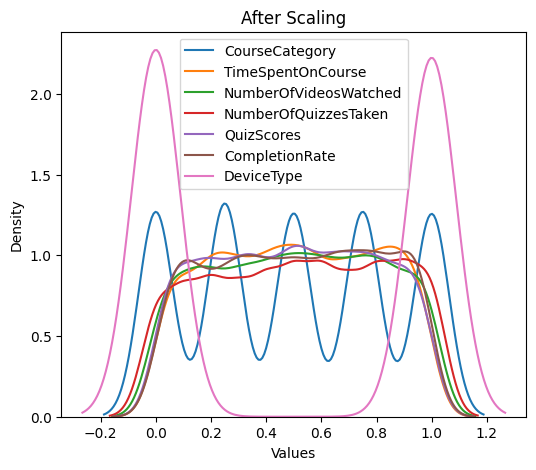

In [41]:
plt.figure(figsize=(6, 5))
plt.title('After Scaling')
plt.xlabel('Values')
for col in X_train.columns:
    sns.kdeplot(X_train[col], label=col)
plt.legend()
plt.show();

# **Handle Imbalance Data**

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
y_train.value_counts()

CourseCompletion
0    3198
1    2488
Name: count, dtype: int64

In [44]:
# SMOTE Initialization
smote = SMOTE(random_state=42)

# Perform oversampling using SMOTE on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Update x_train and y_train with the SMOTE data
X_train, y_train = X_train_resampled, y_train_resampled

# Display the class distribution after oversampling
y_train.value_counts()

CourseCompletion
1    3198
0    3198
Name: count, dtype: int64

# **Create and Training Model**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.metrics import classification_report, accuracy_score

In [47]:
rf = RandomForestClassifier(random_state=42)

# Melatih model dengan data training
rf.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = rf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan laporan klasifikasi
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9589659417316373
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1357
           1       0.97      0.94      0.95      1080

    accuracy                           0.96      2437
   macro avg       0.96      0.96      0.96      2437
weighted avg       0.96      0.96      0.96      2437



# **Visualization Model Perform**

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)

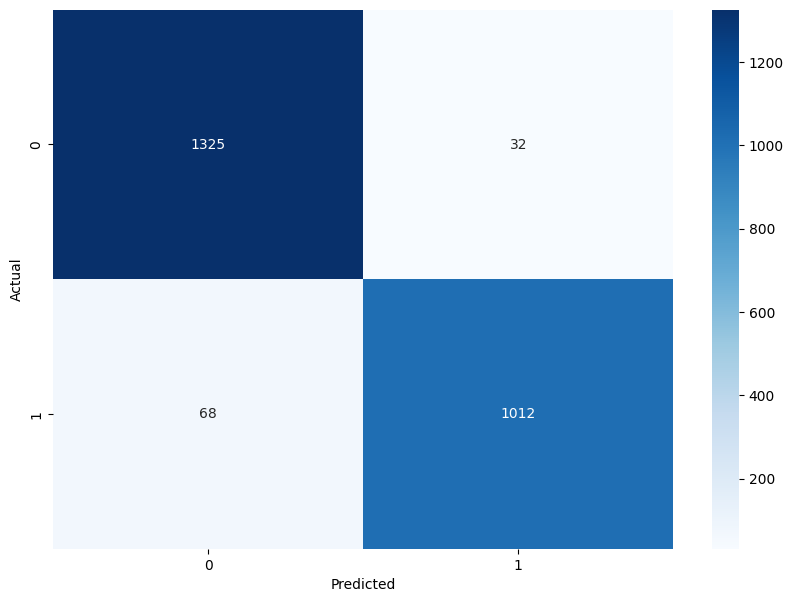

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [51]:
# Mendapatkan pentingnya fitur
feature_importance = rf.feature_importances_

In [52]:
# Mengurutkan fitur berdasarkan kepentingannya
sorted_idx = np.argsort(feature_importance)[::-1]
features = df.columns[sorted_idx]  # Jika X adalah DataFrame, gunakan kolomnya sebagai label fitur
importance = feature_importance[sorted_idx]

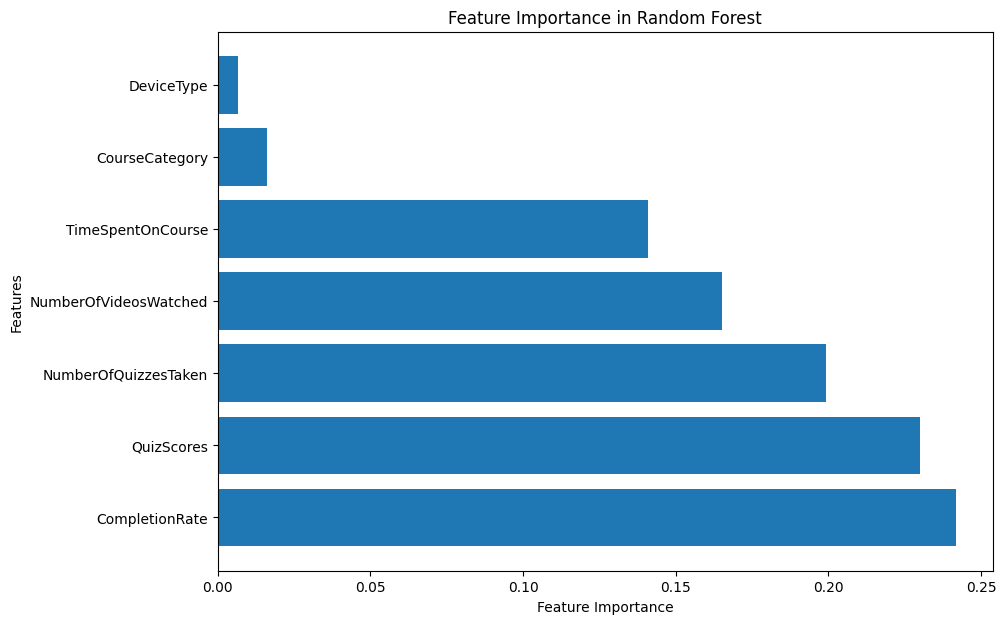

In [53]:
# Membuat plot
plt.figure(figsize=(10, 7))
plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()